In [1]:
# 导入PyTorch库，它是我们用来创造“学生大脑”的工具
import torch

# --- 准备教材 ---

# 1. 创建我们的问题 (X) 和标准答案 (y)
# 我们创建一条直线 y = 2x + 1 的数据
# X 是我们的问题，比如：当 x 是 0, 1, 2, 3, 4 时...
X = torch.tensor([[0], [1], [2], [3], [4]], dtype=torch.float32)

# y 是对应的标准答案，y = 2*X + 1
y = torch.tensor([[1], [3], [5], [7], [9]], dtype=torch.float32)

# 打印一下我们的教材，确认一下
print("--- 这是我们的教材 ---")
for i in range(len(X)):
    print(f"问题 (X): {X[i].item()} -> 标准答案 (y): {y[i].item()}")


--- 这是我们的教材 ---
问题 (X): 0.0 -> 标准答案 (y): 1.0
问题 (X): 1.0 -> 标准答案 (y): 3.0
问题 (X): 2.0 -> 标准答案 (y): 5.0
问题 (X): 3.0 -> 标准答案 (y): 7.0
问题 (X): 4.0 -> 标准答案 (y): 9.0


In [2]:
# 从PyTorch的工具箱里导入 nn，这里面有很多现成的“学生大脑”模型
from torch import nn

# --- 创造学生 ---

# nn.Linear(1, 1) 的意思:
# 创造一个学生，他接收 1 个数字作为输入 (x), 然后输出 1 个数字作为答案 (y)
# 这个学生内部就包含了它需要学习的知识 w 和 b
model = nn.Linear(1, 1)

# 让我们看看这个新生脑子里的初始知识是什么样的
# .parameters() 可以让我们偷看一下学生脑子里的 w 和 b
# 你会看到 w 和 b 是一些随机的数字
print("--- 学生脑子里的初始知识 (随机猜测的) ---")
for name, param in model.named_parameters():
    if name == 'weight':
        print(f"w (斜率) = {param.item():.3f}")
    if name == 'bias':
        print(f"b (截距) = {param.item():.3f}")


--- 学生脑子里的初始知识 (随机猜测的) ---
w (斜率) = 0.587
b (截距) = -0.171


In [3]:
# --- 准备评分和反思工具 ---

# 1. 评分标准：计算平均差距 (Mean Squared Error Loss)
loss_fn = nn.MSELoss()

# 2. 反思方法：告诉学生如何根据分数调整自己 (Stochastic Gradient Descent)
# model.parameters() 的意思是把学生脑子里的 w 和 b 交给这个“反思工具”来管理
# lr=0.01 的意思是每次调整的幅度不要太大，慢慢来
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

print("评分标准和反思方法都准备好了！")


评分标准和反思方法都准备好了！


In [4]:
# --- 开始上课 ---

# 我们打算让学生重复学习 100 遍
epochs = 100
print("--- 教学开始 ---")

# 这是一个循环，重复100次
for epoch in range(epochs):

    # 1. 学生做题 (模型预测)
    # 把所有问题 X 都抛给学生，让他给出他的答案
    y_pred = model(X)

    # 2. 老师评分 (计算损失)
    # 用评分工具，比较学生的答案 y_pred 和标准答案 y
    loss = loss_fn(y_pred, y)

    # 3. 学生反思与调整 (优化器)
    # 3.1 清空上次的反思记录 (非常重要的一步)
    optimizer.zero_grad()
    # 3.2 根据这次的评分进行深刻反思
    loss.backward()
    # 3.3 根据反思结果，微调自己脑子里的 w 和 b
    optimizer.step()

    # 每学习10遍，我们看一下学习效果
    if (epoch + 1) % 10 == 0:
        print(f"学习第 {epoch+1} 遍, 答题差距 (Loss): {loss.item():.4f}")

print("--- 教学结束 ---")


--- 教学开始 ---
学习第 10 遍, 答题差距 (Loss): 1.5969
学习第 20 遍, 答题差距 (Loss): 0.1803
学习第 30 遍, 答题差距 (Loss): 0.0904
学习第 40 遍, 答题差距 (Loss): 0.0763
学习第 50 遍, 答题差距 (Loss): 0.0675
学习第 60 遍, 答题差距 (Loss): 0.0599
学习第 70 遍, 答题差距 (Loss): 0.0531
学习第 80 遍, 答题差距 (Loss): 0.0471
学习第 90 遍, 答题差距 (Loss): 0.0418
学习第 100 遍, 答题差距 (Loss): 0.0371
--- 教学结束 ---


In [5]:
# --- 毕业考试 ---

print("--- 让我们看看学生最终学到了什么 ---")

# 再次偷看一下学生脑子里的知识
for name, param in model.named_parameters():
    if name == 'weight':
        print(f"最终学到的 w (斜率) = {param.item():.3f}")
    if name == 'bias':
        print(f"最终学到的 b (截距) = {param.item():.3f}")

print("\n我们期望的正确答案是 w=2.0 和 b=1.0")
print("可以看到，学生学到的结果已经非常接近了！")

# 让我们来考他一个新问题
# 问：当 x=10 时，y 是多少？ (正确答案应该是 2*10 + 1 = 21)
new_question = torch.tensor([[10.0]])
answer = model(new_question)
print(f"\n老师提问：当 x=10 时, y 是多少？")
print(f"学生回答：y 大约是 {answer.item():.3f}")


--- 让我们看看学生最终学到了什么 ---
最终学到的 w (斜率) = 2.116
最终学到的 b (截距) = 0.669

我们期望的正确答案是 w=2.0 和 b=1.0
可以看到，学生学到的结果已经非常接近了！

老师提问：当 x=10 时, y 是多少？
学生回答：y 大约是 21.829


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31572 (\N{CJK UNIFIED IDEOGRAPH-7B54}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26696 (\N{CJK UNIFIED IDEOGRAPH-6848}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25105 (\N{CJK UNIFIED IDEOGRAPH-6211}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20204 (\N{CJK UNIFIED IDEOGRAPH-4EEC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from font(s) DejaVu Sans.
  fig.canvas

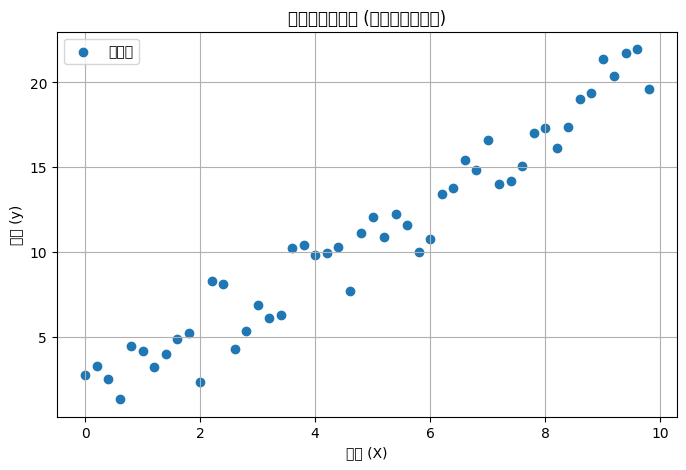

In [6]:
# 导入我们需要的工具
import torch
# 导入一个画图工具，这样我们就能亲眼看到数据和AI画的线了
import matplotlib.pyplot as plt

# --- 准备带噪声的教材 ---

# 我们多准备一些数据点，效果会更明显
X = torch.arange(0, 10, 0.2).view(-1, 1) # 从0到10，每隔0.2取一个点

#  y = 2x + 1，这是我们心中隐藏的“完美”直线
y_perfect = 2 * X + 1

# 关键！我们给每个标准答案 y 加上了一点点随机的、或正或负的“干扰”
# 这就模拟了现实世界中有误差的数据
y = y_perfect + torch.randn_like(y_perfect) * 1.5 # 这里的 1.5 是我加的干扰大小

# --- 让我们画图看看教材长什么样 ---
def plot_data(X_data, y_data, title="我们的学习教材 (带噪声的数据点)"):
    plt.figure(figsize=(8, 5))
    plt.scatter(X_data, y_data, label='数据点') # 画出所有的(x, y)数据点
    plt.title(title)
    plt.xlabel("问题 (X)")
    plt.ylabel("答案 (y)")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_data(X, y)


学生、评分标准和反思方法都准备好了！


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29983 (\N{CJK UNIFIED IDEOGRAPH-751F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31532 (\N{CJK UNIFIED IDEOGRAPH-7B2C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23581 (\N{CJK UNIFIED IDEOGRAPH-5C1D}) missing from font(s) DejaVu Sans.
  fig.canvas

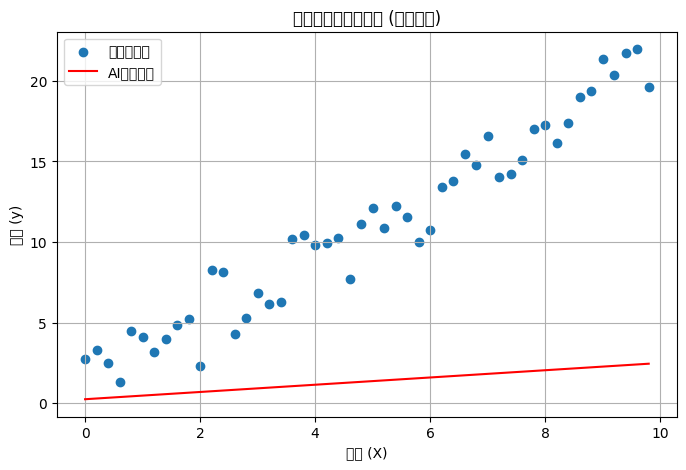

In [7]:
from torch import nn

# --- 创造学生、评分和反思工具 (和上次一模一样) ---
model = nn.Linear(1, 1)
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

print("学生、评分标准和反思方法都准备好了！")

# --- 让我们看看“笨学生”一开始会画出什么样的直线 ---
def plot_predictions(X_data, y_data, model, title="初始状态"):
    # model.eval() 告诉模型“现在是考试时间，不是学习时间”
    model.eval()
    # with torch.no_grad() 意味着“只是看看，不要反思”，可以节省计算
    with torch.no_grad():
        y_pred = model(X_data)

    plt.figure(figsize=(8, 5))
    plt.scatter(X_data, y_data, label='真实数据点')
    plt.plot(X_data, y_pred, color='red', label='AI画的直线') # 画出AI的预测直线
    plt.title(title)
    plt.xlabel("问题 (X)")
    plt.ylabel("答案 (y)")
    plt.legend()
    plt.grid(True)
    plt.show()

# 看看未经训练的模型画出的线，它完全是随机的
plot_predictions(X, y, model, title="学生第一次尝试画线 (完全瞎猜)")


--- 教学开始 ---
学习第 10 遍, 答题差距 (Loss): 2.1169


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36941 (\N{CJK UNIFIED IDEOGRAPH-904D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21518 (\N{CJK UNIFIED IDEOGRAPH-540E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26524 (\N{CJK UNIFIED IDEOGRAPH-679C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


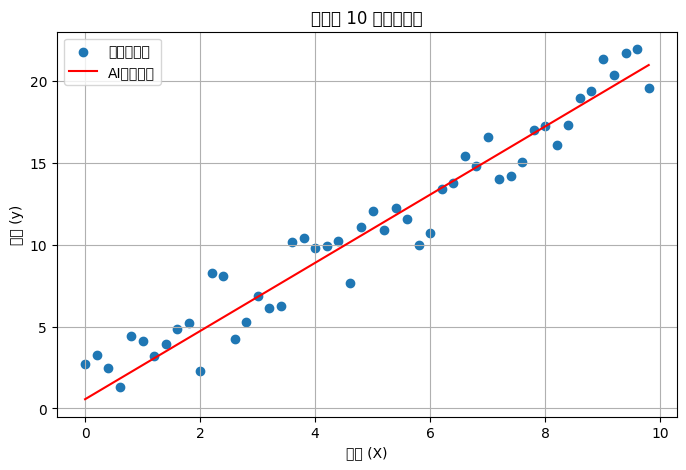

学习第 20 遍, 答题差距 (Loss): 2.1027


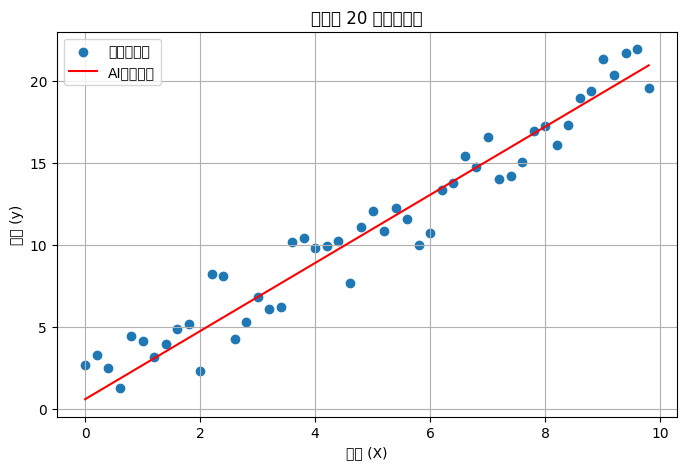

学习第 30 遍, 答题差距 (Loss): 2.0898


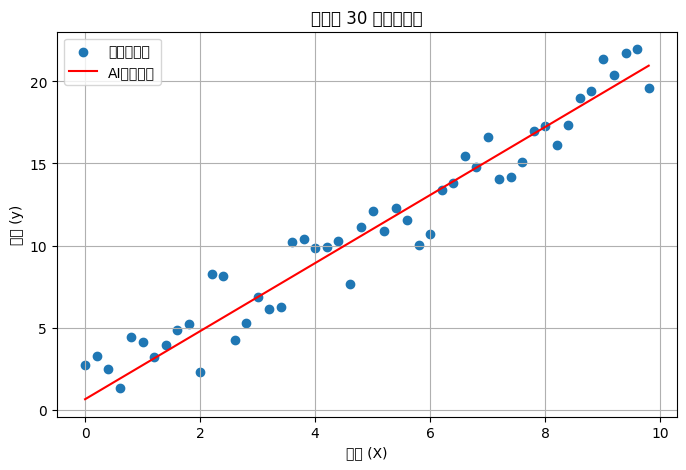

学习第 40 遍, 答题差距 (Loss): 2.0782


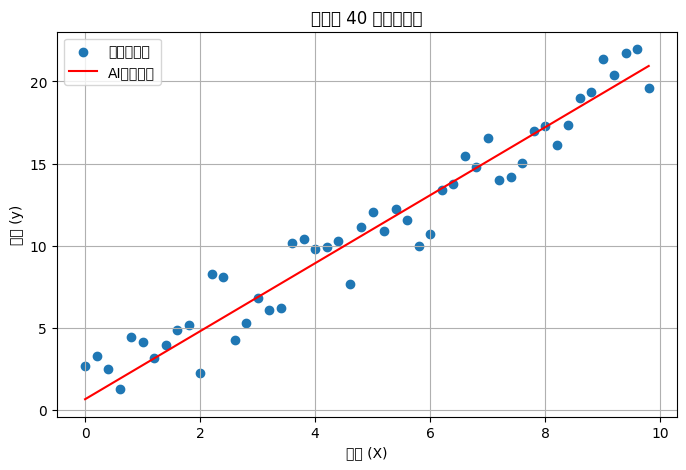

学习第 50 遍, 答题差距 (Loss): 2.0677


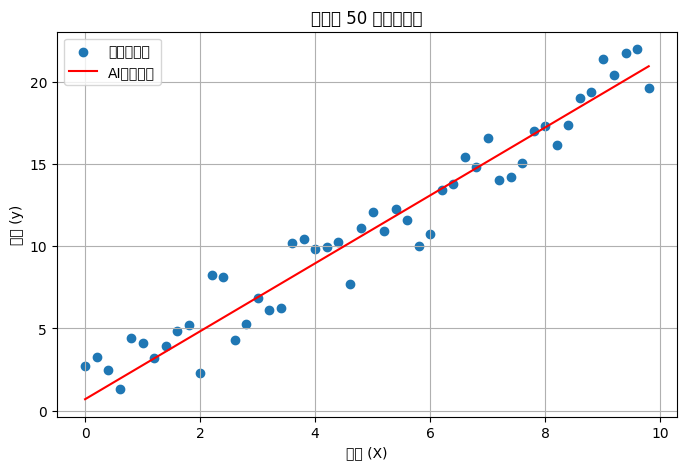

学习第 60 遍, 答题差距 (Loss): 2.0582


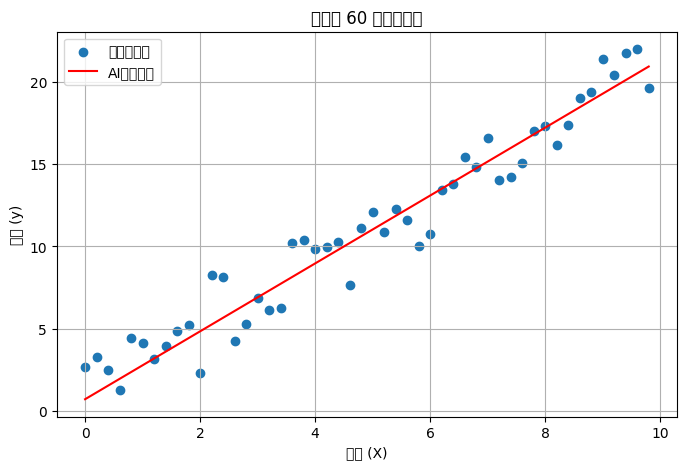

学习第 70 遍, 答题差距 (Loss): 2.0496


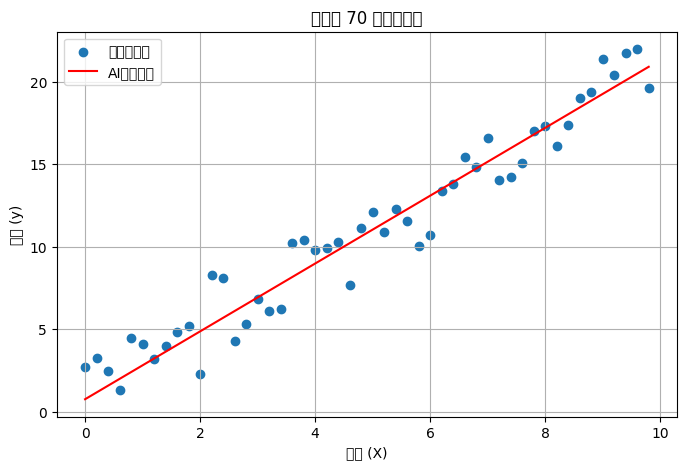

学习第 80 遍, 答题差距 (Loss): 2.0418


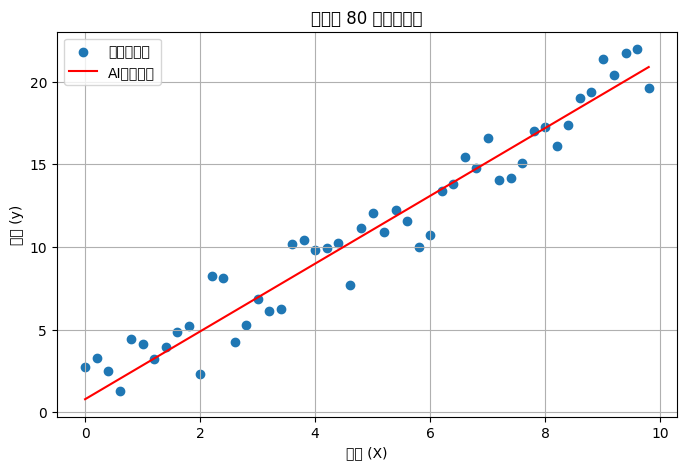

学习第 90 遍, 答题差距 (Loss): 2.0348


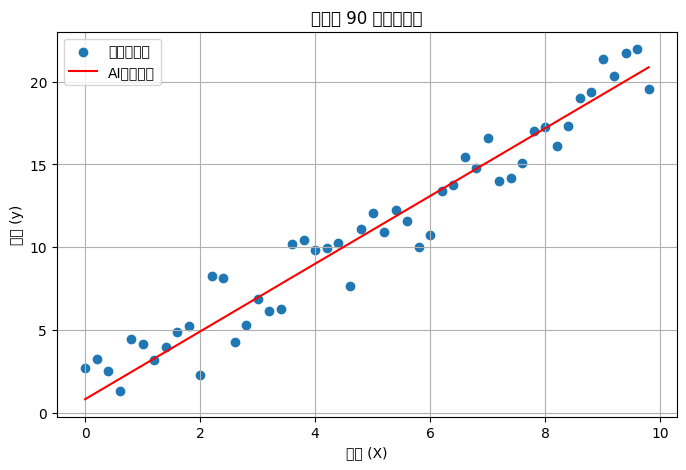

学习第 100 遍, 答题差距 (Loss): 2.0284


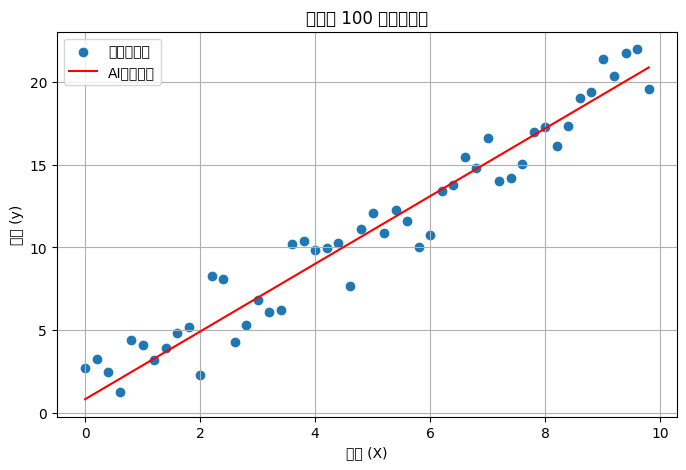

--- 教学结束 ---


In [8]:
# --- 开始上课 ---

epochs = 100
print("--- 教学开始 ---")

for epoch in range(epochs):
    # model.train() 告诉模型“现在是学习时间”
    model.train()

    # 1. 学生做题
    y_pred = model(X)

    # 2. 老师评分
    loss = loss_fn(y_pred, y)

    # 3. 学生反思与调整
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # 每学习10遍，我们旁听一下，看看AI画的线进步了没有
    if (epoch + 1) % 10 == 0:
        print(f"学习第 {epoch+1} 遍, 答题差距 (Loss): {loss.item():.4f}")
        # 画出当前AI的学习成果
        plot_predictions(X, y, model, title=f"学习第 {epoch+1} 遍后的成果")

print("--- 教学结束 ---")


--- 让我们看看学生最终学到了什么 ---
最终学到的 w (斜率) = 2.043
最终学到的 b (截距) = 0.841

我们心中隐藏的答案是 w=2.0 和 b=1.0
因为数据有干扰，所以AI学到的结果不完全是2和1，但已经非常接近了！
这说明它找到了'最适合'这堆噪声数据的直线。


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27605 (\N{CJK UNIFIED IDEOGRAPH-6BD5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19994 (\N{CJK UNIFIED IDEOGRAPH-4E1A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20316 (\N{CJK UNIFIED IDEOGRAPH-4F5C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21697 (\N{CJK UNIFIED IDEOGRAPH-54C1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from font(s) DejaVu Sans.
  fig.canvas

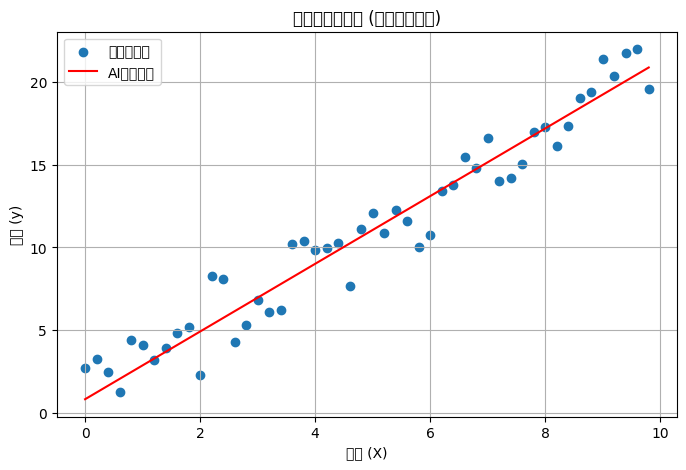

In [9]:
# --- 毕业考试 ---

print("--- 让我们看看学生最终学到了什么 ---")

# 偷看一下学生脑子里的最终知识
w_final, b_final = model.parameters()
print(f"最终学到的 w (斜率) = {w_final.item():.3f}")
print(f"最终学到的 b (截距) = {b_final.item():.3f}")

print("\n我们心中隐藏的答案是 w=2.0 和 b=1.0")
print("因为数据有干扰，所以AI学到的结果不完全是2和1，但已经非常接近了！")
print("这说明它找到了'最适合'这堆噪声数据的直线。")

# 画出最终的毕业作品
plot_predictions(X, y, model, title="学生的毕业作品 (最佳拟合直线)")
